(timestepping_ode)=
# Solving (or "timestepping") an ordinary differential equation (ODE)

## What do we mean by timestepping?

The numerical solution of ODEs is a big topic.  

A common type of ODE you will come across will only include a *first* derivative with respect to an independent variable.
This won't necessarily be time $t$ (it might be space $x$), but we can always "interpret" this indepedent as "time" or a time-like variable. This is why we commonly talk about "timestepping" an ODE even though there are lots of scenarios where
you will be doing this for problems either where $t$ doesn't appear, or isn't the variable the derivative has been taken with respect to!



Aside: What would you do with a problem that includes higher than first order derivative. An example comes from Newton's second law, which tells us about acceleration (or rate of change of momentum), but we want to solve for position ($x$), i.e. we're thinking about an ODE in the form $\ddot{x}=f$.  Well we can always convert higher order problems into a *system* of ODEs only involving first order derivatives by introducing "dummy" variables. In the Newton's second law example just introduce velocity, then we can rewrite our second order problem $\ddot{x}=f$ as the coupled first order problem $\dot{x}=u,\;\dot{u}=f$.

Let's suppose we have an ODE of the form

\\(y' = f(t,y) \qquad\left[\text{NB. on the LHS we could also use the notation $\dot{y}$ or $\frac{dy}{dt}$}\right]
\\)

This is describing a solution function of the form $y\equiv y(t)$, i.e. the solution $y$ is a function of one variable - $t$.  

$y$ is called the *dependent variable* and $t$ the *dependent variable*.

[NB. in the case where $y$ is multi-dimensional - a vector of unknowns/dependent variables - we would talk about a *system of ODEs*. For the case where there are more than one independent variables then we need to start thinking about *partial differential equations (PDEs)*].

For example

$$y' = \exp(t), \qquad\text{or equivalently} \qquad y' = y$$

the first is an example where the RHS is a function of $t$ only, the second a function of $y$ only. 

This is an example where both $t$ and $y$ appear on the RHS:

$$y' = y + t^3$$

The first two ($y'=y$ or $y'=\exp(t)$) are relatively easy for us to solve analytically, the final case is a bit more challenging and we may need to resort to a numerical approach (or attempt symbolic computation).

## Deriving the forward Euler scheme from Taylor series

There are several approached to motivate and develop numerical solvers for ODEs.

One common way is to make use of a Taylor series expansion.

From the notebook on Taylor series we know that (assuming smoothness of the solution) the following is true:

$$ y(t+\Delta t) = y(t) + \Delta t \, y'(t) + \frac{\Delta t^2}{2!}y''(t) + \frac{\Delta t^3}{3!}y'''(t) + \mathcal{O}(\Delta t^4),$$
 

Using the notation $y_n=y(t_n), \; y'_n=y'(t_n)$ etc, and assuming a uniform time step size $\Delta t$, this is equivalent to 

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4).$$

Dropping second-order terms (which we can justify if $y$ is "smooth", which means that $y''$ is "well-behaved", and $\Delta t$ is chosen to be sufficiently small so that the terms containing higher powers of $\Delta t$ are relatively speaking *very small*), 

and noting that $y'_n = f(t_n,y_n)$ we are left with the discrete relation

$$y_{n+1} = y_n + \Delta t \, f(t_n,y_n).$$

<br>

This is a very famous ODE solver, or time-stepping method - termed the **forward Euler** or **explicit Euler** method.

We have turned the continuous problem into a discrete one - we have discretised. And note that this is in a form similar to our logistic map, so we know that we can write a simple piece of code that iterates over $n$ to evaluate/predict/approximate the dynamics.

Let's consider the simple model problem 

$$y' = y$$

with the initial condition

$$y(0)=1$$

and see what one step of the forward Euler method does, we will assume that we start at some $t$ from the exact solution at that time, i.e. the starting point indicated by the red dot in the following image is on the exact solution (black) line.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

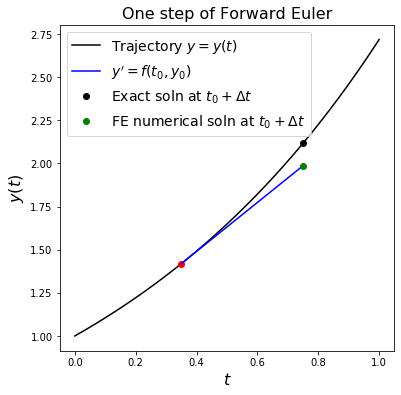

In [2]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('One step of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)

ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4

ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b', label = r"$y'=f(t_0,y_0)$")

ax1.plot([t0 + dt], [y(t0 + dt)], 'ko', label='Exact soln at $t_0 + \Delta t$')
ax1.plot([t0 + dt], [y(t0) + dt * f(t0, y(t0))], 'go', label='FE numerical soln at $t_0 + \Delta t$')
ax1.legend(loc='best', fontsize=14);

The black dot in the figure above shows what the true/exact solution at the new $n$ level is, while the green dot shows what the numerical solver predicts it to be.

The difference between the two is the error that has been introduced in a single step of the method.

Now in the next step of the algorithm we of course have to start from the green dot as we assume in practice we don't know the black line.  

The next step computes

$$y_{n+1} = y_n + \Delta t \, f(t_n,y_n),$$

but note that $f$ for this particular simple test case is simply $y$. 

We assume that we don't know what the exact solution is at this time level, and hence we can't read off the correct $t$ from the $x$ axis in the above plot and compute $\exp(t)$ in the RHS of our update. If we could then this would let us use the correct new slope at this time, i.e. the slope at the black dot.  

Instead we are forced to read off the $y$ axis - notice that in this example this gives us a $y$ value that is too small, and hence an $f$ that is too small. Therefore our next update will give us a second point that is even more too small!

The moral of the story here is that **errors generally accumulate**, as we can see if we plot this next step of the algorithm:

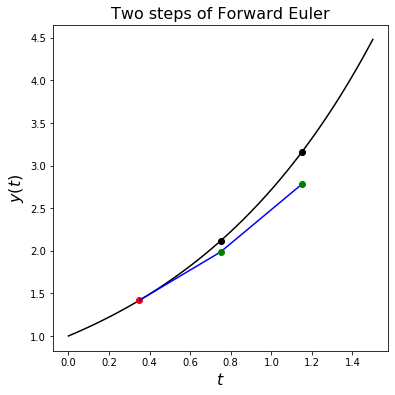

In [3]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('Two steps of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1.5, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)


ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4


ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b')
y1 = y(t0) + dt * f(t0, y(t0))
ax1.plot([t0 + dt, t0 + 2*dt], [y1, y1 + dt * f(t0+dt, y1)], 'b')

ax1.plot([t0 + dt, t0+2*dt], [y(t0 + dt), y(t0+2*dt)], 'ko')
ax1.plot([t0 + dt, t0 + 2*dt], [y(t0) + dt * f(t0, y(t0)), y1 + dt * f(t0+dt, y1)], 'go')
